In [1]:
from data_generator import DataGenerator
import numpy as np
import matplotlib.pyplot as plt


my_rovio = DataGenerator()

In [3]:
vector = [0, 10, 4]
im1 = np.dot(my_rovio.rovio.camera.get_frame(), [
                     0.2989, 0.5870, 0.1140]).astype(np.uint8)
my_rovio.perform_step(vector)
im2 = np.dot(my_rovio.rovio.camera.get_frame(), [
                     0.2989, 0.5870, 0.1140]).astype(np.uint8)

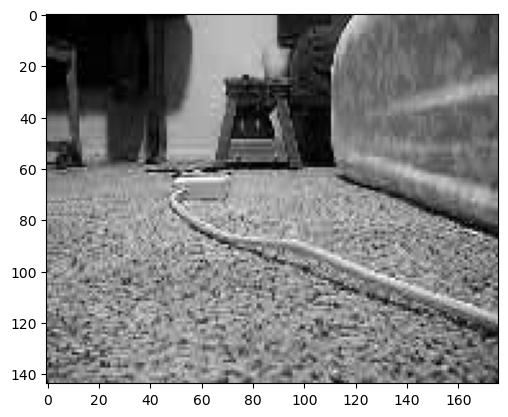

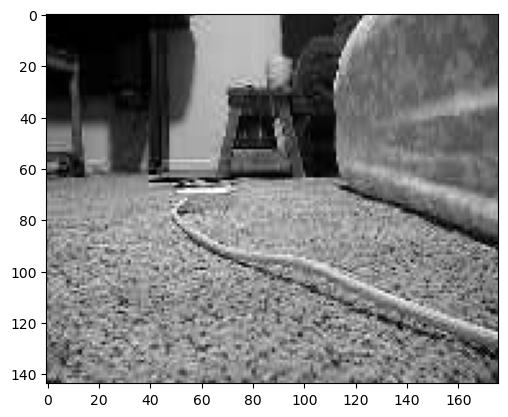

In [4]:
_ = plt.figure()
_ = plt.imshow(im1, cmap="gray")
_ = plt.figure()
_ = plt.imshow(im2, cmap="gray")